<a href="https://colab.research.google.com/github/saniya123x/sentiment-analysis-mental-health/blob/main/sentiment_analysis_for_mentalhealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***DATA CLEANING***

In [2]:
df = pd.read_csv("/content/archive (1).zip")
print(df)                                                        #load the data

              Timestamp  Gender        Country Occupation self_employed  \
0       8/27/2014 11:29  Female  United States  Corporate           NaN   
1       8/27/2014 11:31  Female  United States  Corporate           NaN   
2       8/27/2014 11:32  Female  United States  Corporate           NaN   
3       8/27/2014 11:37  Female  United States  Corporate            No   
4       8/27/2014 11:43  Female  United States  Corporate            No   
...                 ...     ...            ...        ...           ...   
292359  7/27/2015 23:25    Male  United States   Business           Yes   
292360   8/17/2015 9:38    Male   South Africa   Business            No   
292361  8/25/2015 19:59    Male  United States   Business            No   
292362   9/26/2015 1:07    Male  United States   Business            No   
292363   2/1/2016 23:04    Male  United States   Business            No   

       family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0                  No

In [3]:
df.info()                                     #get the summary information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
df.head()                                         #to preview the data

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [5]:
df.describe()                   #to get the statistical analysis and summaries

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [6]:
df.isnull()                           # to find the null values

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
292360,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
292361,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
292362,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()                             #to get the sum of the null values

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [8]:
df =  df.drop(columns=['Timestamp'])
df.head()  #dropped the column the timestamp coz its irrelevant

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [9]:
mode_value = df['self_employed'].mode()[0]
df['self_employed'] = df['self_employed'].fillna(mode_value)
df['self_employed'].isnull().sum()

0

In [10]:
df.isnull().sum()

,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0
Mental_Health_History,0


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   292364 non-null  object
 1   Country                  292364 non-null  object
 2   Occupation               292364 non-null  object
 3   self_employed            292364 non-null  object
 4   family_history           292364 non-null  object
 5   treatment                292364 non-null  object
 6   Days_Indoors             292364 non-null  object
 7   Growing_Stress           292364 non-null  object
 8   Changes_Habits           292364 non-null  object
 9   Mental_Health_History    292364 non-null  object
 10  Mood_Swings              292364 non-null  object
 11  Coping_Struggles         292364 non-null  object
 12  Work_Interest            292364 non-null  object
 13  Social_Weakness          292364 non-null  object
 14  mental_health_interv

In [12]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['Country', 'Gender','self_employed','Occupation', 'treatment', 'Days_Indoors',
                       'Growing_Stress', 'family_history','Changes_Habits', 'Mental_Health_History',
                       'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
                       'Social_Weakness', 'mental_health_interview', 'care_options']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Display the transformed DataFrame
print(df.head())


   Gender  Country  Occupation  self_employed  family_history  treatment  \
0       0       34           1              0               0          1   
1       0       34           1              0               1          1   
2       0       34           1              0               1          1   
3       0       34           1              0               1          1   
4       0       34           1              0               1          1   

   Days_Indoors  Growing_Stress  Changes_Habits  Mental_Health_History  \
0             0               2               1                      2   
1             0               2               1                      2   
2             0               2               1                      2   
3             0               2               1                      2   
4             0               2               1                      2   

   Mood_Swings  Coping_Struggles  Work_Interest  Social_Weakness  \
0            2                

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Gender                   292364 non-null  int64
 1   Country                  292364 non-null  int64
 2   Occupation               292364 non-null  int64
 3   self_employed            292364 non-null  int64
 4   family_history           292364 non-null  int64
 5   treatment                292364 non-null  int64
 6   Days_Indoors             292364 non-null  int64
 7   Growing_Stress           292364 non-null  int64
 8   Changes_Habits           292364 non-null  int64
 9   Mental_Health_History    292364 non-null  int64
 10  Mood_Swings              292364 non-null  int64
 11  Coping_Struggles         292364 non-null  int64
 12  Work_Interest            292364 non-null  int64
 13  Social_Weakness          292364 non-null  int64
 14  mental_health_interview  292364 non-

In [14]:
from sklearn.preprocessing import StandardScaler

# List the numerical columns you want to scale
numerical_columns = ['Days_Indoors']  # You can add more numerical columns here

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the scaled values
print(df[numerical_columns].head())


   Days_Indoors
0     -1.382454
1     -1.382454
2     -1.382454
3     -1.382454
4     -1.382454


***Data Visulization***

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'self_employed'}>],
       [<Axes: title={'center': 'family_history'}>,
        <Axes: title={'center': 'treatment'}>,
        <Axes: title={'center': 'Days_Indoors'}>,
        <Axes: title={'center': 'Growing_Stress'}>],
       [<Axes: title={'center': 'Changes_Habits'}>,
        <Axes: title={'center': 'Mental_Health_History'}>,
        <Axes: title={'center': 'Mood_Swings'}>,
        <Axes: title={'center': 'Coping_Struggles'}>],
       [<Axes: title={'center': 'Work_Interest'}>,
        <Axes: title={'center': 'Social_Weakness'}>,
        <Axes: title={'center': 'mental_health_interview'}>,
        <Axes: title={'center': 'care_options'}>]], dtype=object)

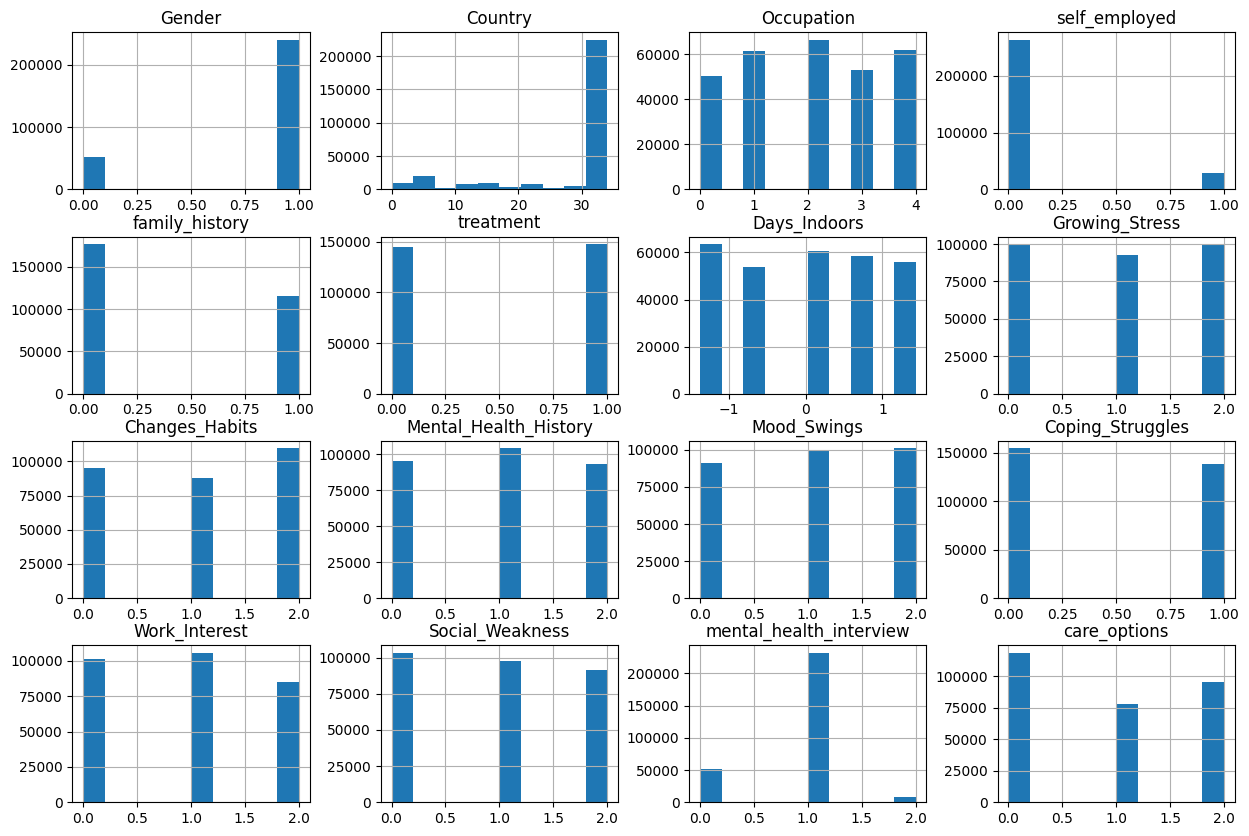

In [15]:
df.hist(figsize=(15,10))

In [16]:
df.columns


Index(['Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')

In [17]:
# Compute the correlation matrix
correlation_matrix = df.corr()

target_correlations = correlation_matrix['family_history'].abs().sort_values(ascending=False)
print("Features most strongly correlated with 'family_history':\n", target_correlations)

# Identify features most strongly correlated with each other (excluding 'family_history')
features_correlation = correlation_matrix.drop('family_history').drop('family_history', axis=1)
strong_correlations = features_correlation[features_correlation > 0.7]
print("\nFeatures strongly correlated with each other:\n", strong_correlations)


Features most strongly correlated with 'family_history':
 family_history             1.000000
treatment                  0.366781
Gender                     0.199213
care_options               0.124575
Country                    0.031170
mental_health_interview    0.024417
Growing_Stress             0.011305
self_employed              0.011248
Coping_Struggles           0.011226
Mental_Health_History      0.005733
Occupation                 0.004632
Days_Indoors               0.004374
Mood_Swings                0.004304
Work_Interest              0.003915
Social_Weakness            0.001710
Changes_Habits             0.001109
Name: family_history, dtype: float64

Features strongly correlated with each other:
                          Gender  Country  Occupation  self_employed  \
Gender                      1.0      NaN         NaN            NaN   
Country                     NaN      1.0         NaN            NaN   
Occupation                  NaN      NaN         1.0            NaN 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


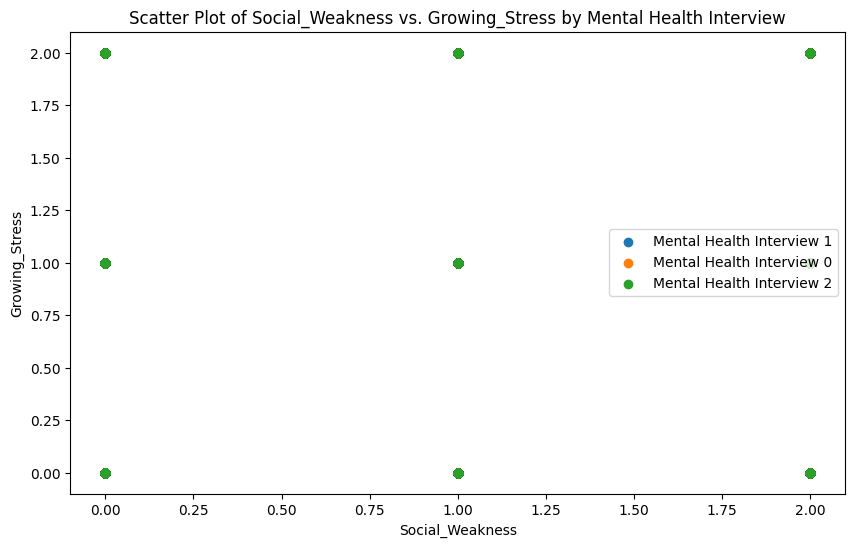

In [18]:
import matplotlib.pyplot as plt

# Define features for the scatter plot
feature1 = 'Social_Weakness'
feature2 = 'Growing_Stress'

# Create the scatter plot
plt.figure(figsize=(10, 6))
for mental_health in df['mental_health_interview'].unique():
    subset = df[df['mental_health_interview'] == mental_health]
    plt.scatter(subset[feature1], subset[feature2], label=f'Mental Health Interview {mental_health}')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot of {feature1} vs. {feature2} by Mental Health Interview')
plt.legend()
plt.show()


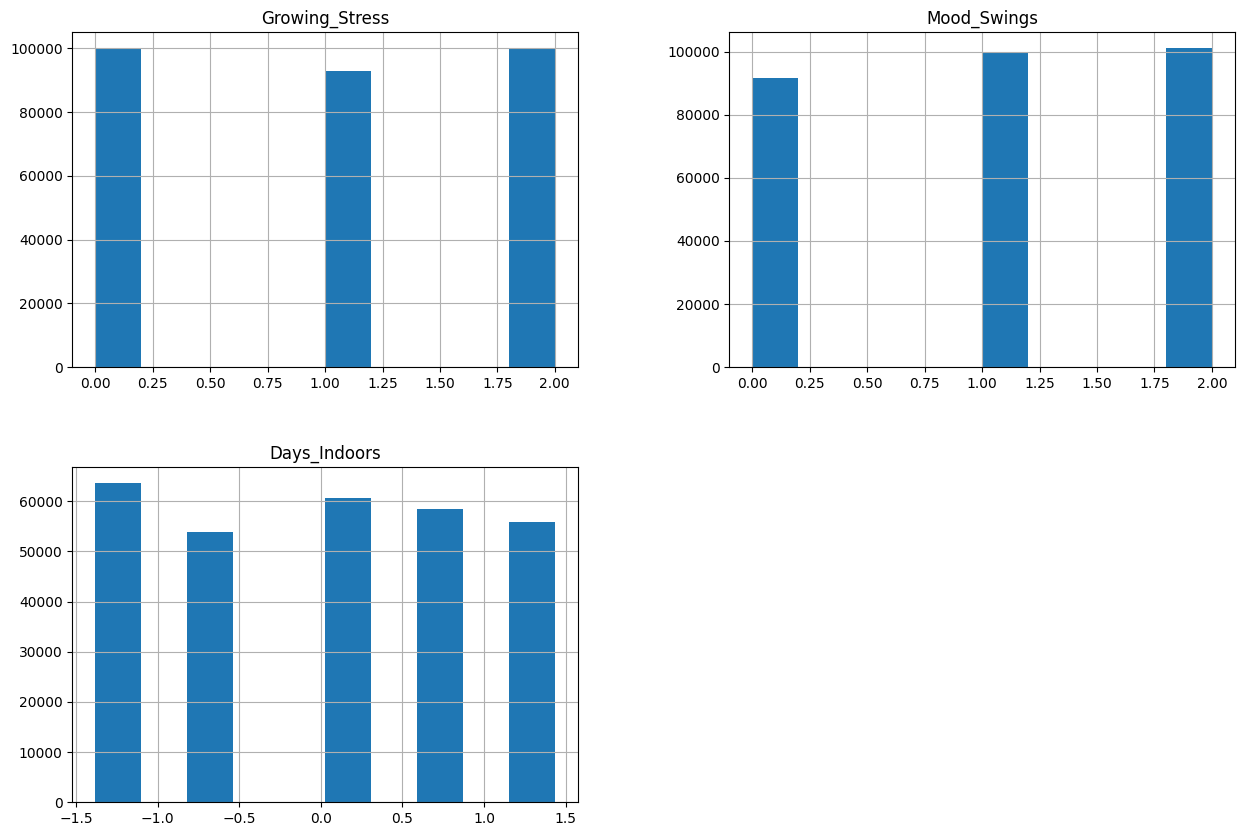

In [19]:
#univariate visulization (single feature )
df[['Growing_Stress', 'Mood_Swings', 'Days_Indoors']].hist(figsize=(15, 10))
plt.show()


bivariate visulizations

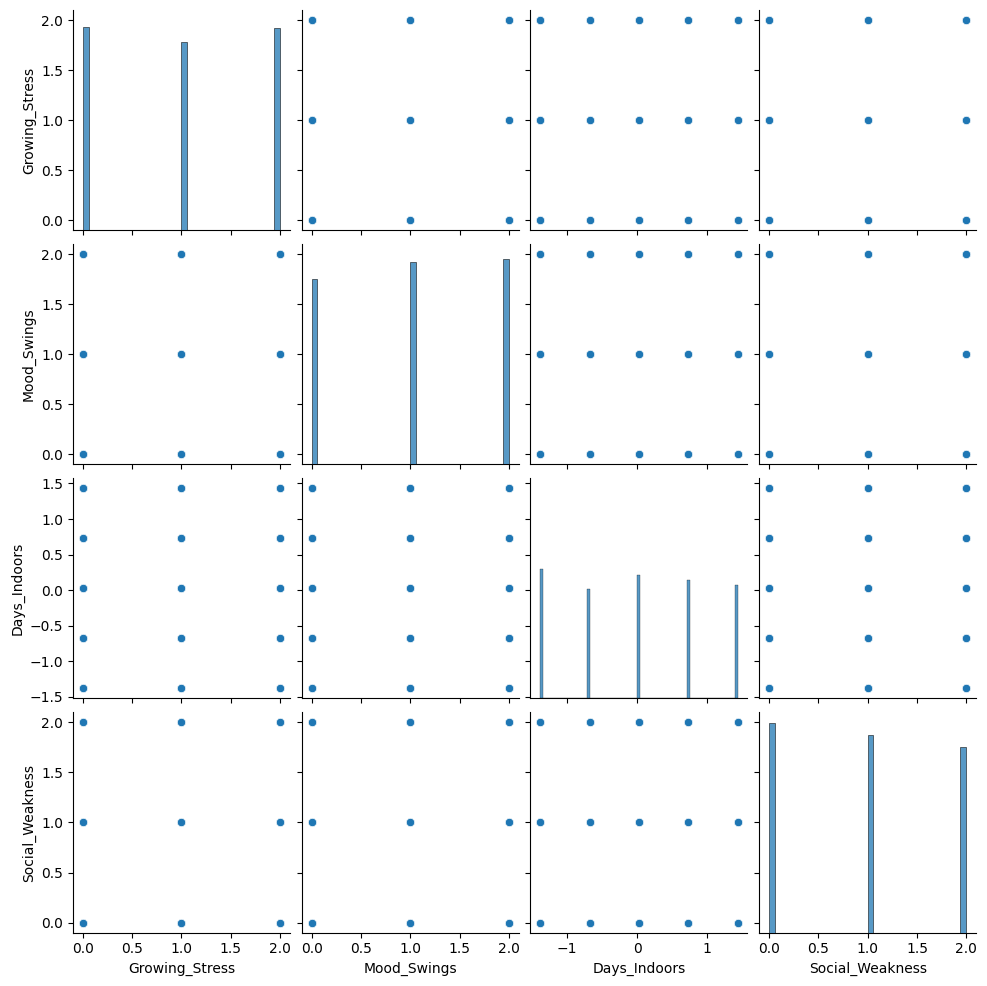

In [20]:
#pair plot
sns.pairplot(df[['Growing_Stress', 'Mood_Swings', 'Days_Indoors', 'Social_Weakness']])
plt.show()


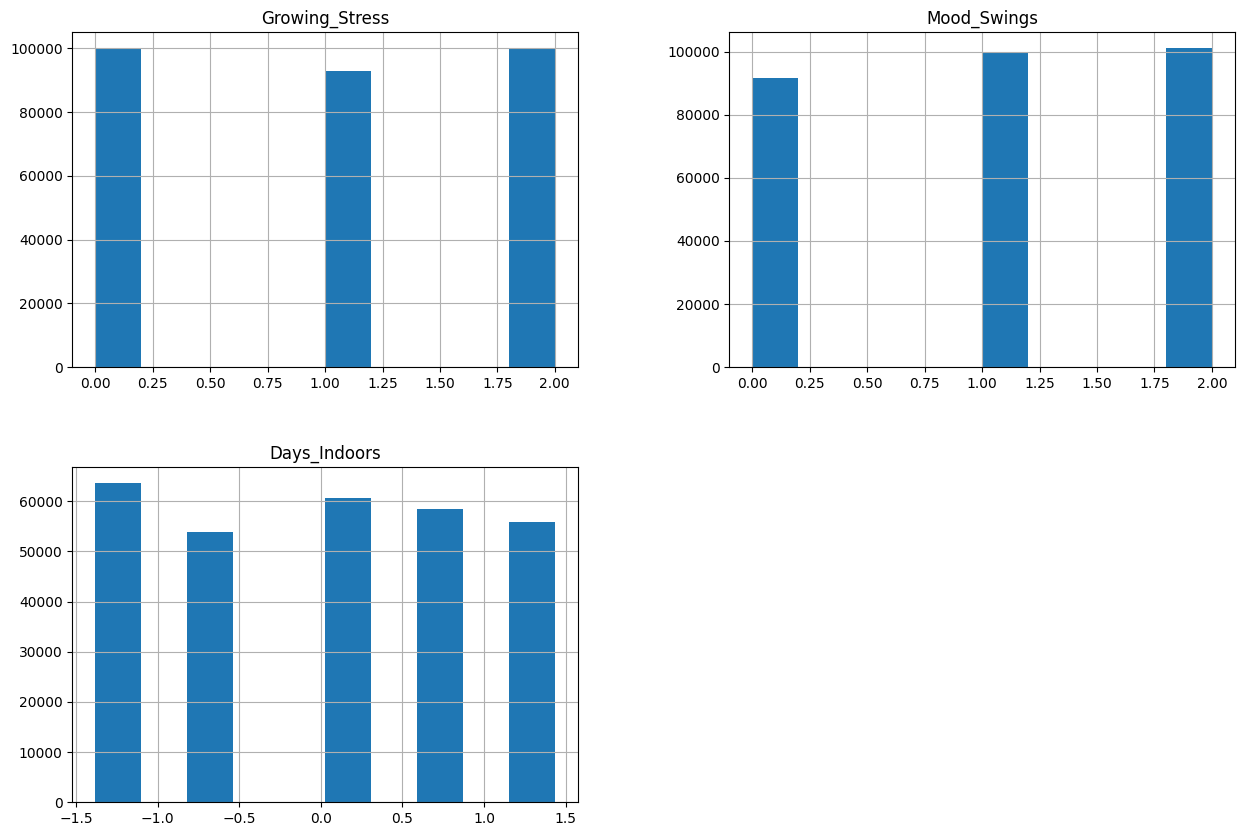

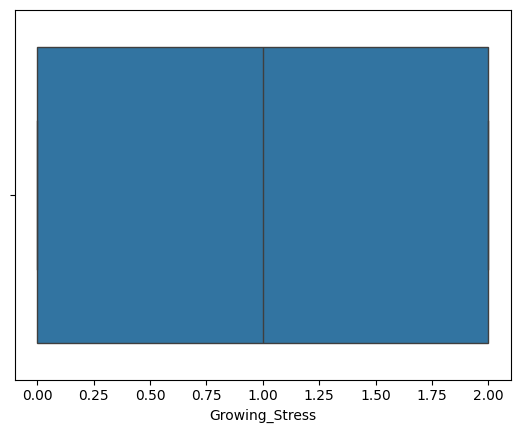

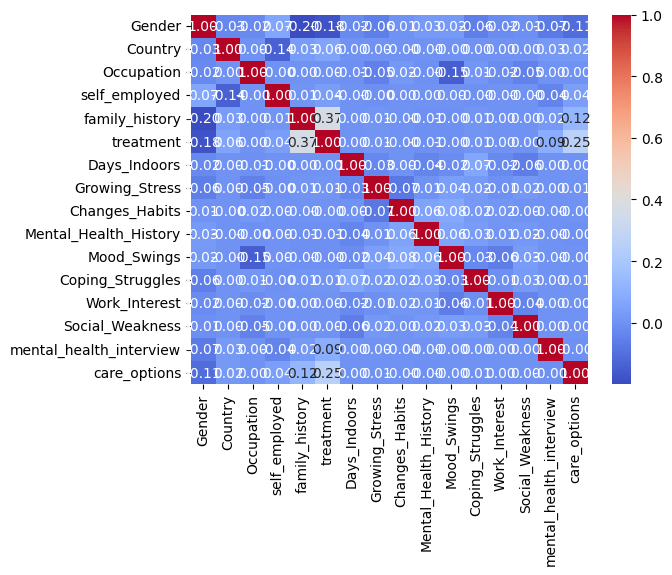

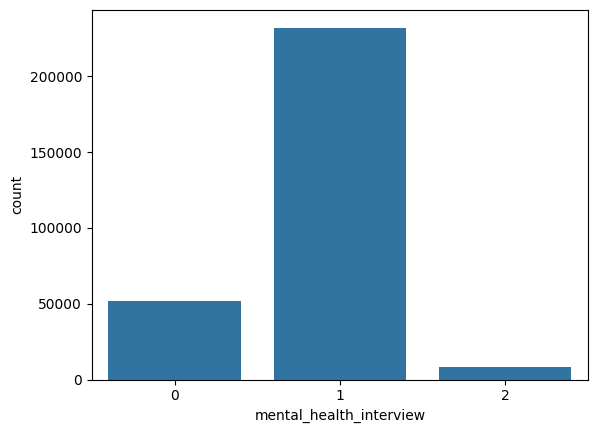

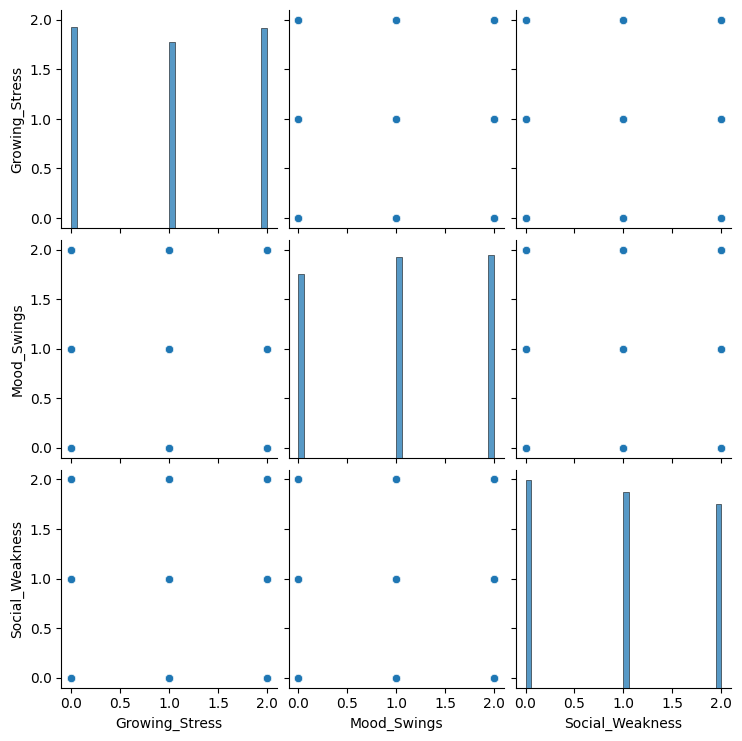

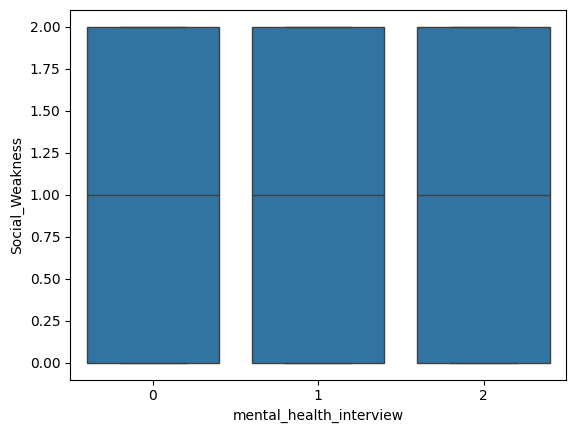

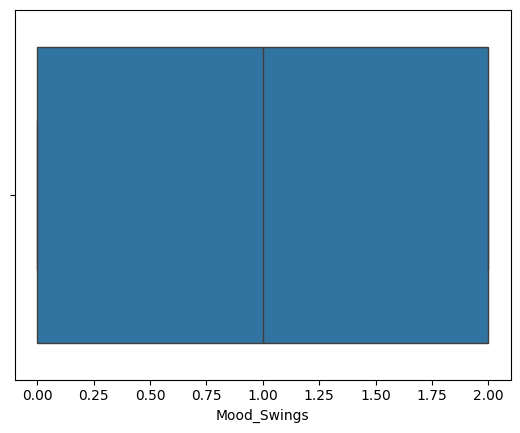

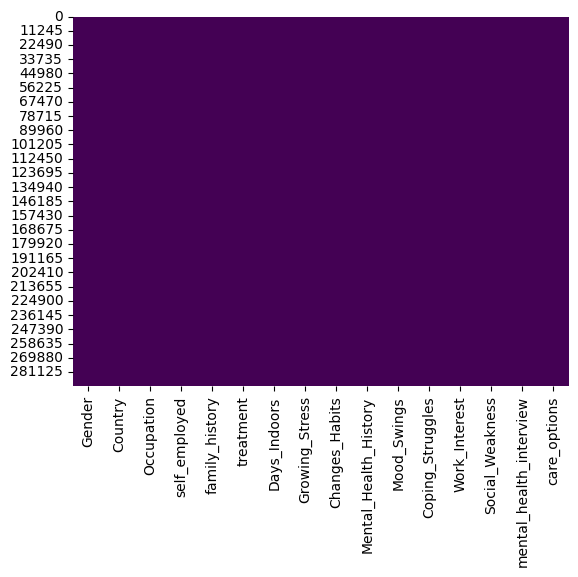

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of continuous variables
df[['Growing_Stress', 'Mood_Swings', 'Days_Indoors']].hist(figsize=(15, 10))
plt.show()

# Boxplot for Growing Stress to detect outliers
sns.boxplot(x='Growing_Stress', data=df)
plt.show()

# Correlation heatmap for numerical features
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Countplot for categorical features (Mental Health Interview)
sns.countplot(x='mental_health_interview', data=df)
plt.show()

# Pairplot to examine relationships between features
sns.pairplot(df[['Growing_Stress', 'Mood_Swings', 'Social_Weakness']])
plt.show()

# Boxplot for Mental Health Interview vs Social Weakness
sns.boxplot(x='mental_health_interview', y='Social_Weakness', data=df)
plt.show()

# Boxplot for Mood Swings to check outliers
sns.boxplot(x='Mood_Swings', data=df)
plt.show()

# Heatmap for missing data visualization
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


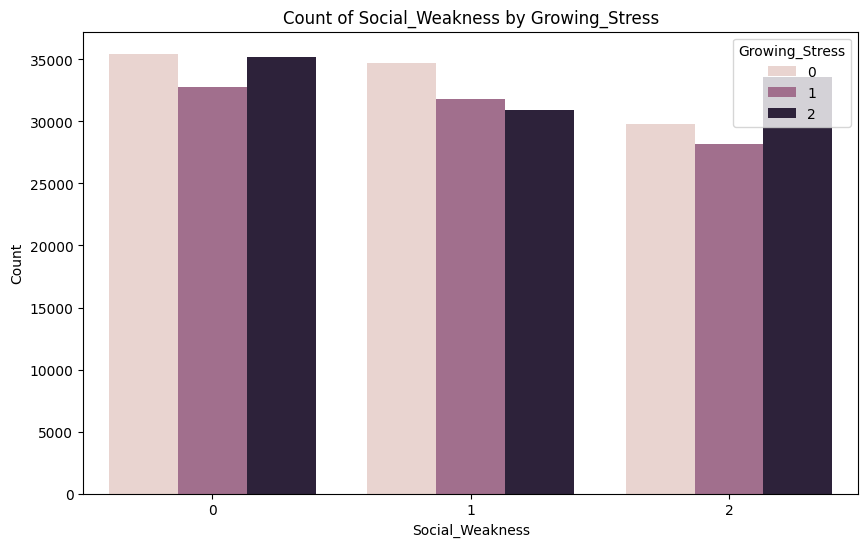

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features for the bar plot
feature1 = 'Social_Weakness'
feature2 = 'Growing_Stress'

# Create the bar plot (or countplot)
plt.figure(figsize=(10, 6))
sns.countplot(x=feature1, hue=feature2, data=df)
plt.xlabel(feature1)
plt.ylabel('Count')
plt.title(f'Count of {feature1} by {feature2}')
plt.show()


In [23]:
x=df.drop('Social_Weakness',axis=1)
y=df['Social_Weakness']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'GaussianNB':GaussianNB()
}

In [25]:
for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f"Accuracy Score of {name} is {accuracy_score(y_test,y_pred)}")

Accuracy Score of LogisticRegression is 0.41097600601987244
Accuracy Score of DecisionTreeClassifier is 0.9797513382244797
Accuracy Score of RandomForestClassifier is 0.9799394592375968
Accuracy Score of KNeighborsClassifier is 0.929403314350213
Accuracy Score of GaussianNB is 0.3934123441588425


In [26]:
for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f'{name} Classification Report:')
  print(classification_report(y_test,y_pred))

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.56      0.47     20542
           1       0.42      0.34      0.38     19596
           2       0.42      0.31      0.36     18335

    accuracy                           0.41     58473
   macro avg       0.41      0.41      0.40     58473
weighted avg       0.41      0.41      0.40     58473

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     20542
           1       0.98      0.98      0.98     19596
           2       0.98      0.98      0.98     18335

    accuracy                           0.98     58473
   macro avg       0.98      0.98      0.98     58473
weighted avg       0.98      0.98      0.98     58473

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     2

<ipython-input-27-ad863460d854>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.values()), y=list(accuracy_scores.keys()), palette='viridis')


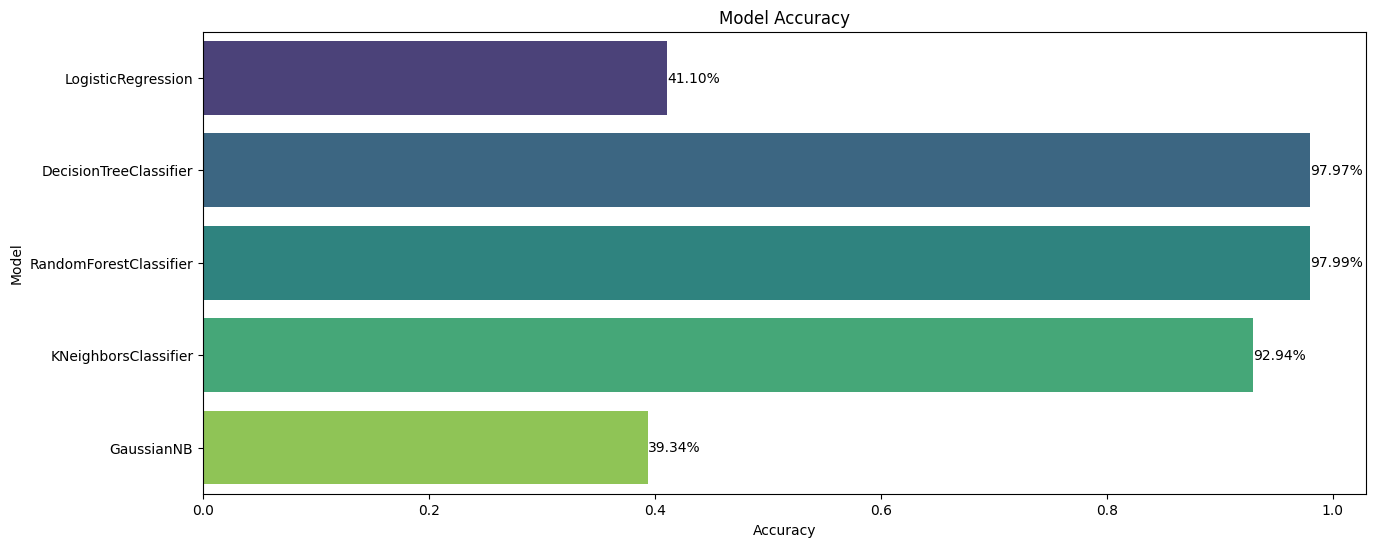

In [27]:

accuracy_scores = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

plt.figure(figsize=(15, 6))
sns.barplot(x=list(accuracy_scores.values()), y=list(accuracy_scores.keys()), palette='viridis')
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')
for i, v in enumerate(accuracy_scores.values()):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')
plt.show()

In [28]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Sample model
model = RandomForestClassifier(random_state=42)

model.fit(x_train, y_train)

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('labelencoder.pkl', 'wb') as file:
    pickle.dump(le, file)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

# Function to predict mental health interview based on user input symptoms
def predict_mental_health(symptoms):
    symptoms = [symptoms]  # Convert input to a list
    prediction = model.predict(symptoms)
    return le.inverse_transform(prediction)[0]

# Function to get user input and predict
def get_user_input_and_predict():
    print("Enter the details for prediction:")
    gender = int(input("Gender (0 for Female 1 for male ): "))
    country = int(input("Country (0 for United States, 1 for Poland, 2 for Australia): "))
    occupation = int(input("Occupation (0 for Corporate): "))
    self_employed = int(input("Self-employed (0 for No): "))
    family_history = int(input("Family history (0 for No, 1 for Yes): "))
    treatment = int(input("Treatment (0 for No, 1 for Yes): "))
    days_indoors = int(input("Days Indoors (0 for 1-14 days): "))
    growing_stress = int(input("Growing stress (0 for Yes): "))
    changes_habits = int(input("Changes in habits (0 for No): "))
    mental_health_history = int(input("Mental health history (0 for Yes): "))
    mood_swings = int(input("Mood swings (0 for Medium): "))
    coping_struggles = int(input("Coping struggles (0 for No): "))
    work_interest = int(input("Work interest (0 for Yes): "))
    social_weakness = int(input("Social weakness (0 for No, 1 for Maybe): "))
    care_options = int(input("Care options (0 for No): "))
    # Example input: [gender, country, occupation, self_employed, family_history, treatment, days_indoors, growing_stress, changes_habits, mental_health_history, mood_swings, coping_struggles, work_interest, social_weakness]
    symptoms_input = [0, country, occupation, self_employed, family_history, treatment, days_indoors, growing_stress, changes_habits, mental_health_history, mood_swings, coping_struggles, work_interest, social_weakness ,care_options]
    predicted_mental_health = predict_mental_health(symptoms_input)

    print(f"The predicted mental health  status is: {predicted_mental_health}")

# Call the function to get input and make prediction
get_user_input_and_predict()


Accuracy: 97.99%
Enter the details for prediction:


In [ ]:
!streamlit run main.py & npx localtunnel --port 8501